<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment6/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularization**

# 1. Load Data
<hr>

In [211]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

print(f"x1_train shape = {x1_train.shape}")
print(f"x2_train shape = {x2_train.shape}")
print(f"label_train shape = {data_train[:, 2].shape}")

print(f"x1_test shape = {x1_test.shape}")
print(f"x2_test shape = {x2_test.shape}")
print(f"label_test shape = {data_test[:, 2].shape}")

x1_train shape = (200,)
x2_train shape = (200,)
label_train shape = (200,)
x1_test shape = (200,)
x2_test shape = (200,)
label_test shape = (200,)


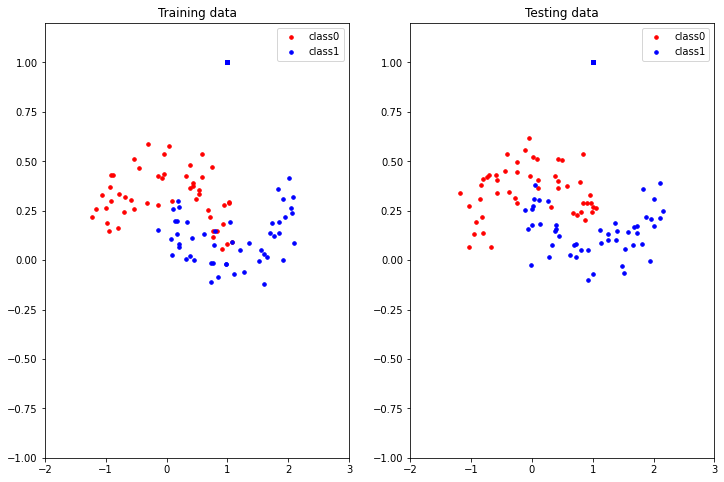

In [212]:
f = plt.figure(1, figsize=(12,8))
ax1 = f.add_subplot(121)
ax1.set(xlim=[-2, 3], ylim=[-1, 1.2], title='Training data')
ax1.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax1.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker=".", label="class1")
ax1.legend()

ax2 = f.add_subplot(122)
ax2.set(xlim=[-2, 3], ylim=[-1, 1.2], title='Testing data')
ax2.scatter(x1_test[idx_class0_train], x2_test[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax2.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker=".", label="class1")
ax2.legend()

plt.show()

# 2. Make train, test, theta Matrix
<hr>

In [213]:
## make train theta and train matrix
n = data_train.shape[0]
theta = np.ones((10*10))[:,None]
X_train = np.ones((n,10*10))

k = 0;
for i in range(10):
  for j in range(10):
    X_train[:,k] = pow(x1_train, i) * pow(x2_train, j)
    k += 1

## make test matrix
X_test = np.ones((n,10*10))

k = 0
for i in range(10):
  for j in range(10):
    
    X_test[:,k] = pow(x1_test, i) * pow(x2_test, j)
    k += 1

# print matrix shape
print(f"theta shape = {theta.shape}")
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")

theta shape = (100, 1)
X_train shape = (200, 100)
X_test shape = (200, 100)


In [214]:
print(X_train[0, 20])

0.57896881


# 3. Define a logistic regression loss function and its gradient
<hr>

In [277]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1/(1+np.exp(-z))
    return sigmoid_f 

# predictive function definition
def f_pred(X,theta): 
    p = sigmoid(np.dot(X,theta))
    return p

# loss function definition
def f_loss(y_pred, y, theta, lda): 
    n = len(y)
    y_pred = np.clip(y_pred, 1e-10, 1-1e-10)
    loss = -1/n * (np.dot(y.T, np.log(y_pred)) + np.dot((1-y).T, np.log(1-y_pred))) + lda/2 * np.dot(theta.T, theta)
    return loss

# gradient function definition
def f_grad(y_pred, y, X, theta, lda):
    n = len(y)
    grad = 2/n * np.dot(X.T, (y_pred - y)) + lda * theta
    return grad

# gradient descent function definition
def grad_desc(X_train, X_test, y , theta_init, lr, lda, max_iter):

    L_train = np.zeros([max_iter]) # record the loss values
    L_test = np.zeros([max_iter])

    theta = theta_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_train = f_pred(X_train,theta) # linear predicition function   
        y_test = f_pred(X_test, theta)
        grad_f = f_grad(y_train, y, X_train, theta, lda) # gradient of the loss  
        theta = theta - lr * grad_f # update rule of gradient descent  
        L_train[i] = f_loss(y_train, y, theta, lda) # save the current loss value 
        L_test[i] = f_loss(y_test, y, theta, lda)
        
    return theta, L_train, L_test

# 4. Run a gradient descent algorithm
<hr>

In [216]:
import time

# define y
y = data_train[:,2][:,None]
print(y.shape)

(200, 1)


Time= 70.068692445755


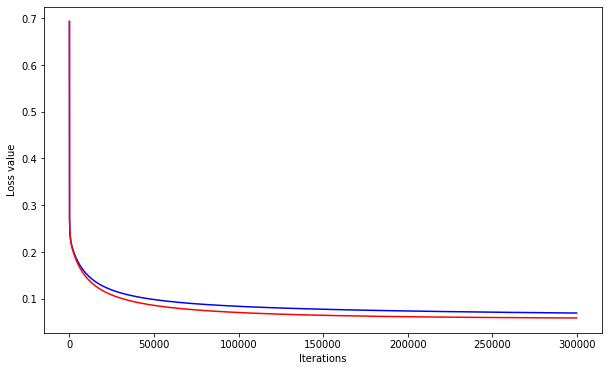

In [282]:
# run gradient descent algorithm: lda = 0.00001
start = time.time()
theta_init = np.zeros((10*10))[:,None]
lda = 0.00001
lr = 1e-2; max_iter = 300000
theta_1, L_train_1, L_test_1 = grad_desc(X_train, X_test, y, theta_init, lr, lda, max_iter)
print('Time=',time.time() - start)

# plot
plt.figure(2, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_train_1, c='b')
plt.plot(np.array(range(max_iter)), L_test_1, c='r')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

Time= 69.48781490325928


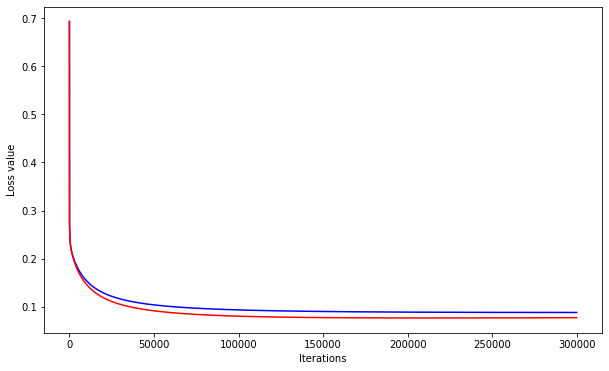

In [284]:
# run gradient descent algorithm: lda = 0.0001
start = time.time()
theta_init = np.zeros((10*10))[:,None]
lda = 0.0001
lr = 1e-2; max_iter = 300000
theta_2, L_train_2, L_test_2 = grad_desc(X_train, X_test, y, theta_init, lr, lda, max_iter)
print('Time=',time.time() - start)

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_train_2, c='b')
plt.plot(np.array(range(max_iter)), L_test_2, c='r')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

Time= 117.26913142204285


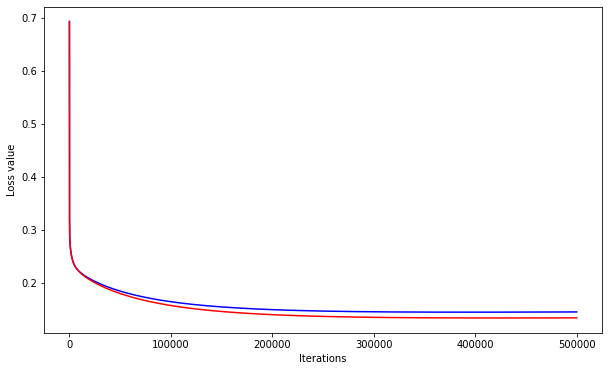

In [250]:
# run gradient descent algorithm: lda = 0.001
start = time.time()
theta_init = np.zeros((10*10))[:,None]
lda = 0.001
lr = 1e-3; max_iter = 500000
theta_3, L_train_3, L_test_3 = grad_desc(X_train, X_test, y, theta_init, lr, lda, max_iter)
print('Time=',time.time() - start)

# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_train_3, c='b')
plt.plot(np.array(range(max_iter)), L_test_3, c='r')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

Time= 238.53770780563354


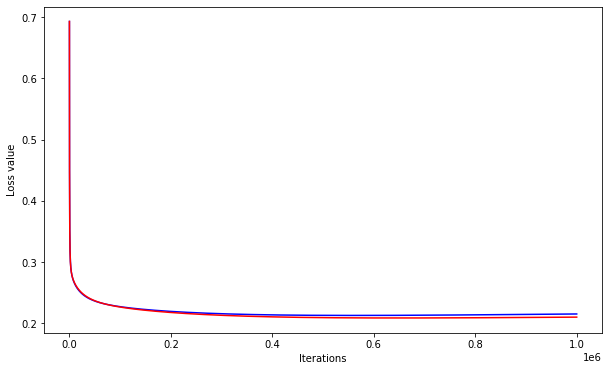

In [258]:
# run gradient descent algorithm: lda = 0.01
start = time.time()
theta_init = np.zeros((10*10))[:,None]
lda = 0.01
lr = 1e-4; max_iter = 1000000
theta_4, L_train_4, L_test_4 = grad_desc(X_train, X_test, y, theta_init, lr, lda, max_iter)
print('Time=',time.time() - start)

# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_train_4, c='b')
plt.plot(np.array(range(max_iter)), L_test_4, c='r')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

Time= 233.0144979953766


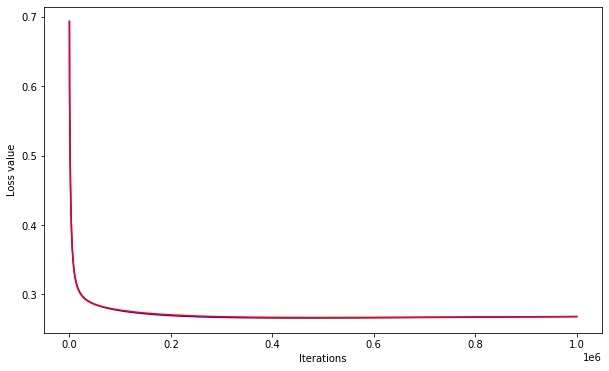

In [260]:
# run gradient descent algorithm: lda = 0.1
start = time.time()
theta_init = np.zeros((10*10))[:,None]
lda = 0.1
lr = 1e-5; max_iter = 1000000
theta_5, L_train_5, L_test_5 = grad_desc(X_train, X_test, y, theta_init, lr, lda, max_iter)
print('Time=',time.time() - start)

# plot
plt.figure(5, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_train_5, c='b')
plt.plot(np.array(range(max_iter)), L_test_5, c='r')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

# 5. Plot the probability map
<hr>

In [222]:
xx1_train, xx2_train = np.meshgrid(np.linspace(-1, 1.2), np.linspace(-2, 3))  # create meshgrid

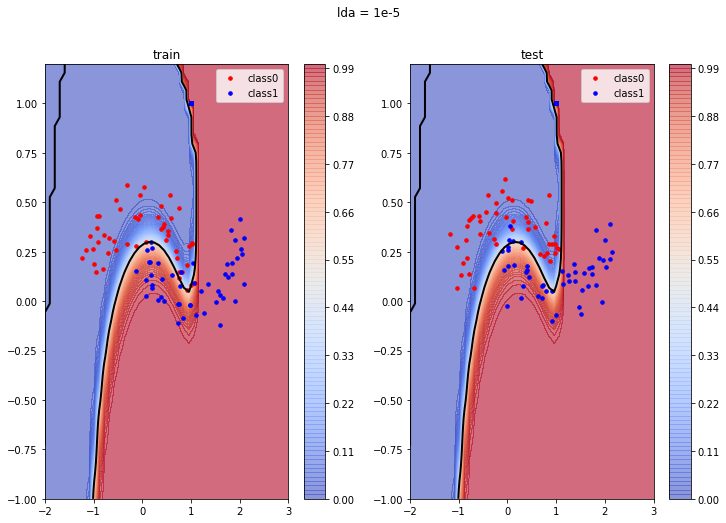

In [283]:
z_train_1 = np.ones_like(xx1_train, dtype=np.float128)

X_pred = np.ones((1, 10 * 10),dtype=np.float128)


for (a,b),v in np.ndenumerate(z_train_1):
  k = 0;
  for i in range(10):
    for j in range(10):
      X_pred[:,k] = pow(xx2_train[a,b], i) * pow(xx1_train[a,b], j)
      k += 1
  z_train_1[a,b] = f_pred(X_pred, theta_1)


f = plt.figure(1, figsize=(12,8))
f.suptitle("lda = 1e-5")
ax1 = f.add_subplot(121)
ax1.set(xlim=[-2, 3], ylim=[-1, 1.2], title='train')
ax = ax1.contourf(xx2_train,xx1_train,z_train_1,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax1.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax1.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_1, levels=1, linewidths=2, colors='k') 
plt.legend()

ax2 = f.add_subplot(122)
ax2.set(xlim=[-2, 3], ylim=[-1, 1.2], title='test')
ax = ax2.contourf(xx2_train,xx1_train,z_train_1,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax2.scatter(x1_test[idx_class0_train], x2_test[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax2.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_1, levels=1, linewidths=2, colors='k') 
plt.legend()
plt.show() 

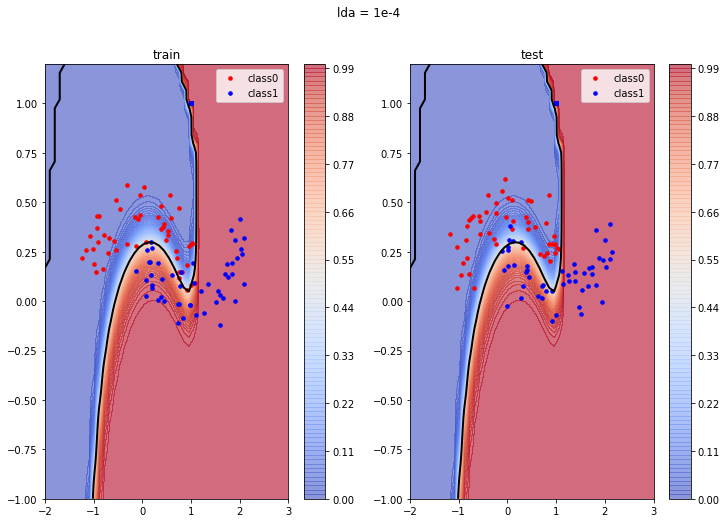

In [285]:
z_train_2 = np.ones_like(xx1_train, dtype=np.float128)

X_pred = np.ones((1, 10 * 10),dtype=np.float128)


for (a,b),v in np.ndenumerate(z_train_2):
  k = 0;
  for i in range(10):
    for j in range(10):
      X_pred[:,k] = pow(xx2_train[a,b], i) * pow(xx1_train[a,b], j)
      k += 1
  z_train_2[a,b] = f_pred(X_pred, theta_2)


f = plt.figure(1, figsize=(12,8))
f.suptitle("lda = 1e-4")
ax1 = f.add_subplot(121)
ax1.set(xlim=[-2, 3], ylim=[-1, 1.2], title='train')
ax = ax1.contourf(xx2_train,xx1_train,z_train_2,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax1.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax1.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_2, levels=1, linewidths=2, colors='k') 
plt.legend()

ax2 = f.add_subplot(122)
ax2.set(xlim=[-2, 3], ylim=[-1, 1.2], title='test')
ax = ax2.contourf(xx2_train,xx1_train,z_train_2,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax2.scatter(x1_test[idx_class0_train], x2_test[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax2.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_2, levels=1, linewidths=2, colors='k') 
plt.legend()
plt.show() 

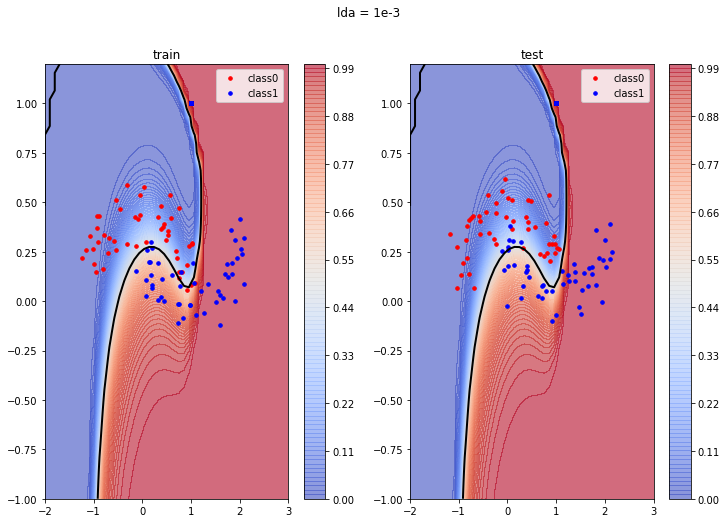

In [251]:
z_train_3 = np.ones_like(xx1_train, dtype=np.float128)

X_pred = np.ones((1, 10 * 10),dtype=np.float128)


for (a,b),v in np.ndenumerate(z_train_3):
  k = 0;
  for i in range(10):
    for j in range(10):
      X_pred[:,k] = pow(xx2_train[a,b], i) * pow(xx1_train[a,b], j)
      k += 1
  z_train_3[a,b] = f_pred(X_pred, theta_3)


f = plt.figure(1, figsize=(12,8))
f.suptitle("lda = 1e-3")
ax1 = f.add_subplot(121)
ax1.set(xlim=[-2, 3], ylim=[-1, 1.2], title='train')
ax = ax1.contourf(xx2_train,xx1_train,z_train_3,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax1.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax1.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_3, levels=1, linewidths=2, colors='k') 
plt.legend()

ax2 = f.add_subplot(122)
ax2.set(xlim=[-2, 3], ylim=[-1, 1.2], title='test')
ax = ax2.contourf(xx2_train,xx1_train,z_train_3,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax2.scatter(x1_test[idx_class0_train], x2_test[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax2.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_3, levels=1, linewidths=2, colors='k') 
plt.legend()
plt.show() 

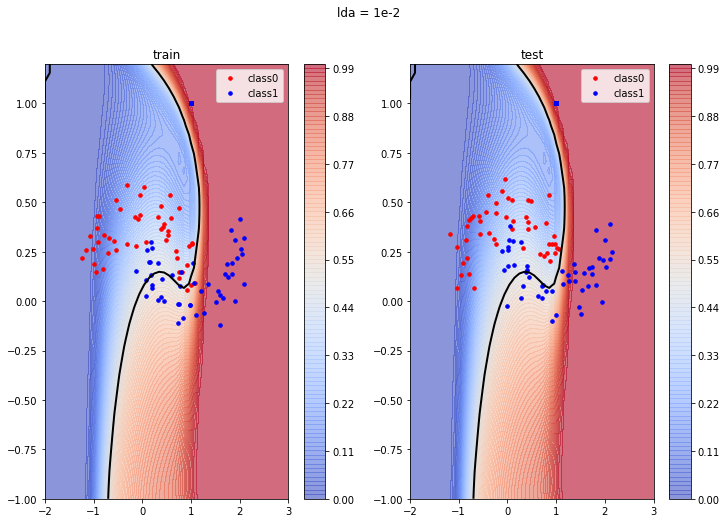

In [259]:
z_train_4 = np.ones_like(xx1_train, dtype=np.float128)

X_pred = np.ones((1, 10 * 10),dtype=np.float128)


for (a,b),v in np.ndenumerate(z_train_4):
  k = 0;
  for i in range(10):
    for j in range(10):
      X_pred[:,k] = pow(xx2_train[a,b], i) * pow(xx1_train[a,b], j)
      k += 1
  z_train_4[a,b] = f_pred(X_pred, theta_4)


f = plt.figure(1, figsize=(12,8))
f.suptitle("lda = 1e-2")
ax1 = f.add_subplot(121)
ax1.set(xlim=[-2, 3], ylim=[-1, 1.2], title='train')
ax = ax1.contourf(xx2_train,xx1_train,z_train_4,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax1.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax1.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_4, levels=1, linewidths=2, colors='k') 
plt.legend()

ax2 = f.add_subplot(122)
ax2.set(xlim=[-2, 3], ylim=[-1, 1.2], title='test')
ax = ax2.contourf(xx2_train,xx1_train,z_train_4,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax2.scatter(x1_test[idx_class0_train], x2_test[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax2.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_4, levels=1, linewidths=2, colors='k') 
plt.legend()
plt.show() 

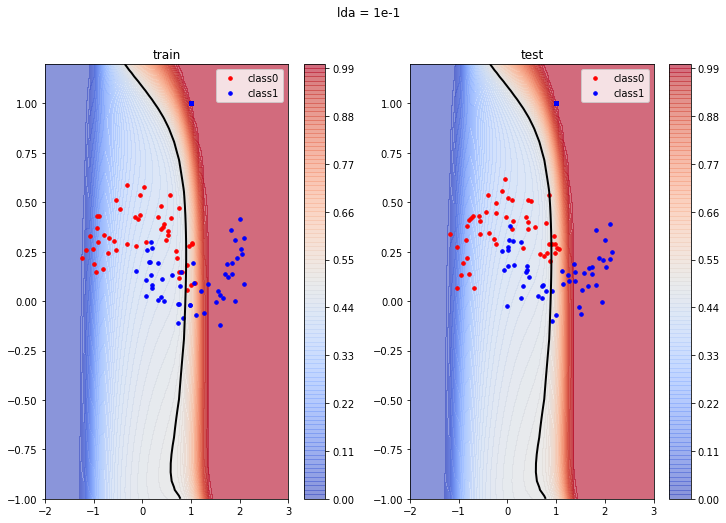

In [261]:
z_train_5 = np.ones_like(xx1_train, dtype=np.float128)

X_pred = np.ones((1, 10 * 10),dtype=np.float128)


for (a,b),v in np.ndenumerate(z_train_5):
  k = 0;
  for i in range(10):
    for j in range(10):
      X_pred[:,k] = pow(xx2_train[a,b], i) * pow(xx1_train[a,b], j)
      k += 1
  z_train_5[a,b] = f_pred(X_pred, theta_5)


f = plt.figure(1, figsize=(12,8))
f.suptitle("lda = 1e-1")
ax1 = f.add_subplot(121)
ax1.set(xlim=[-2, 3], ylim=[-1, 1.2], title='train')
ax = ax1.contourf(xx2_train,xx1_train,z_train_5,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax1.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax1.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_5, levels=1, linewidths=2, colors='k') 
plt.legend()

ax2 = f.add_subplot(122)
ax2.set(xlim=[-2, 3], ylim=[-1, 1.2], title='test')
ax = ax2.contourf(xx2_train,xx1_train,z_train_5,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

ax2.scatter(x1_test[idx_class0_train], x2_test[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax2.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker=".", label="class1")
plt.contour(xx2_train,xx1_train,z_train_5, levels=1, linewidths=2, colors='k') 
plt.legend()
plt.show() 